In [7]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Initial Data:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  --

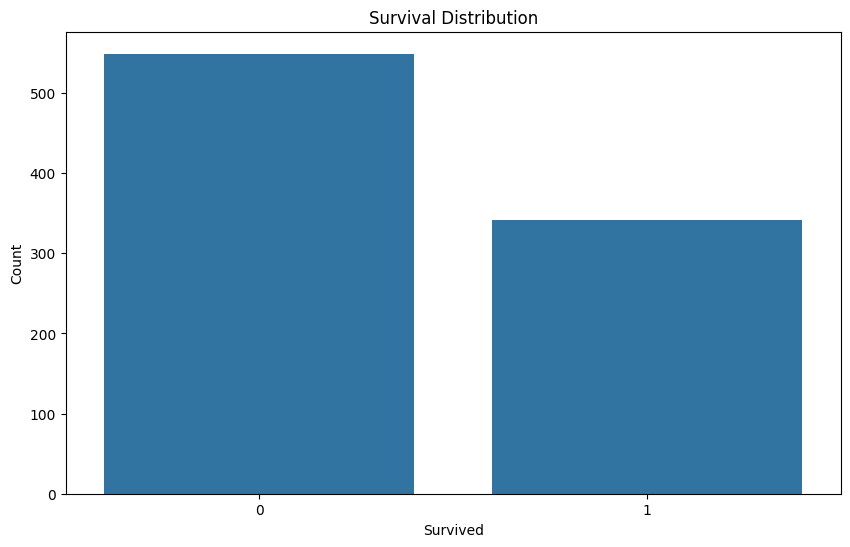

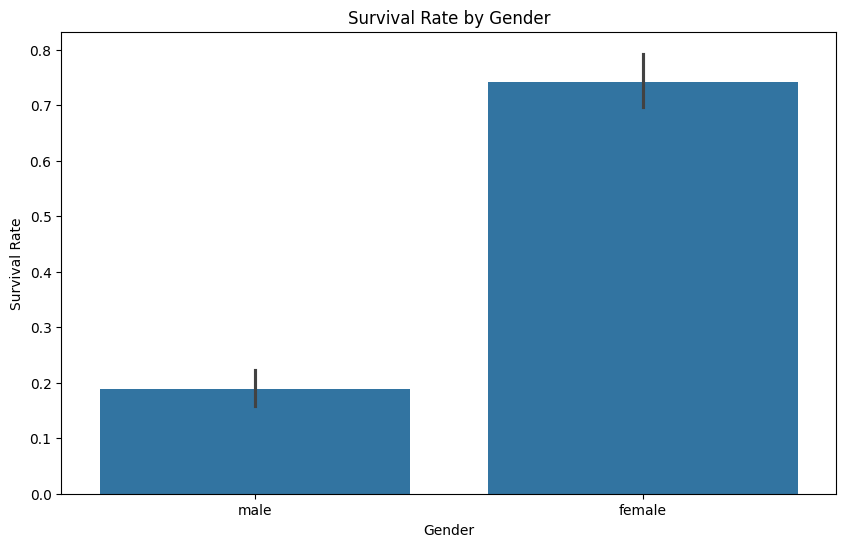

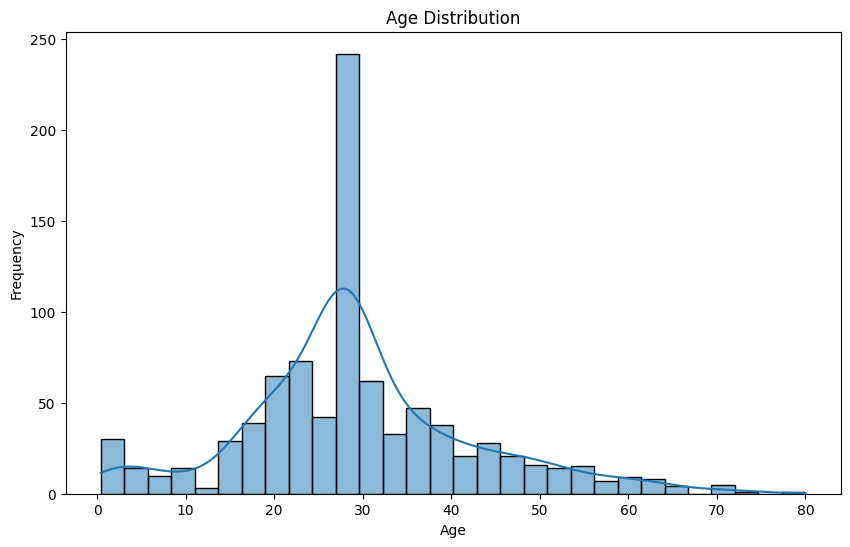

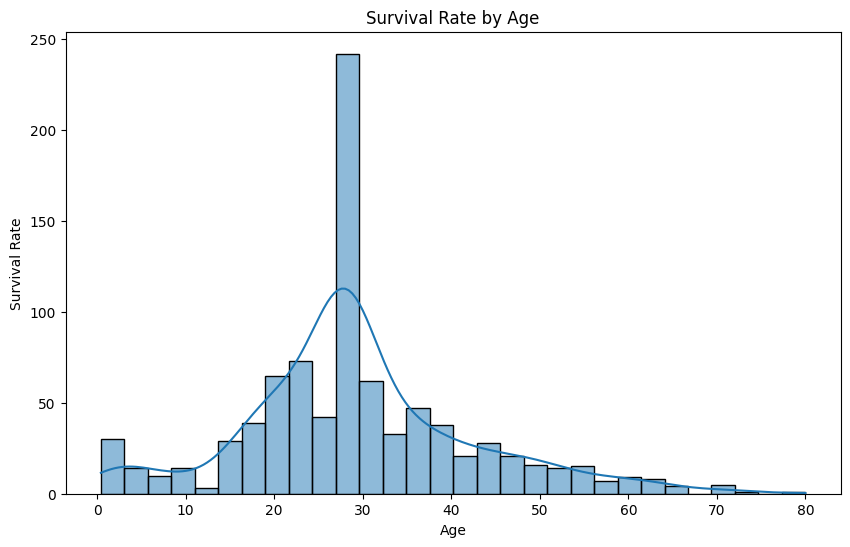

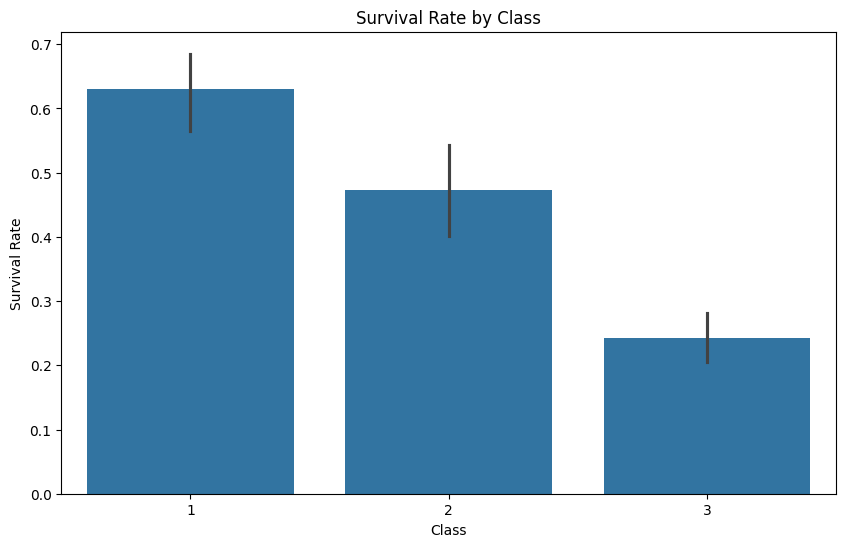

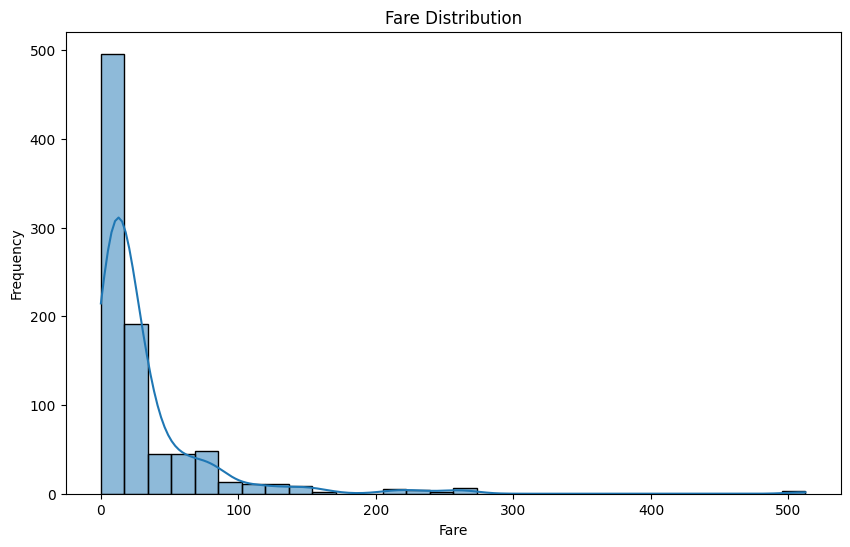

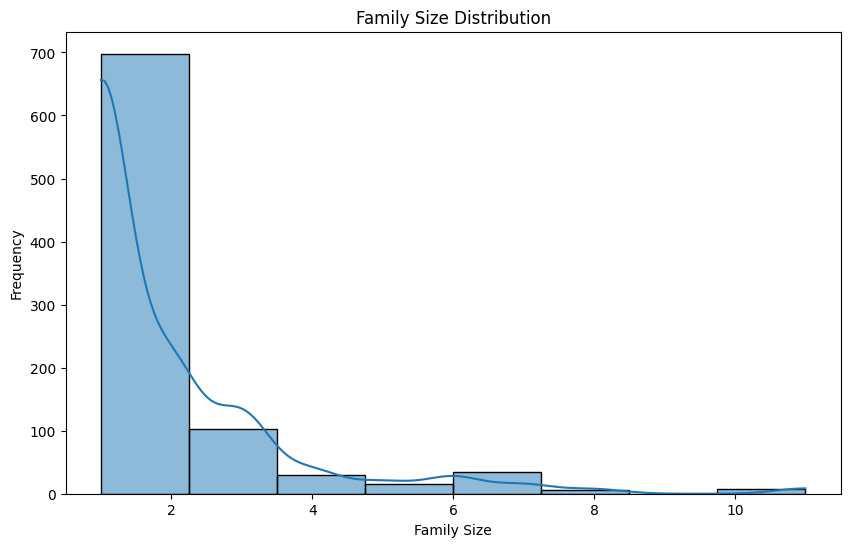

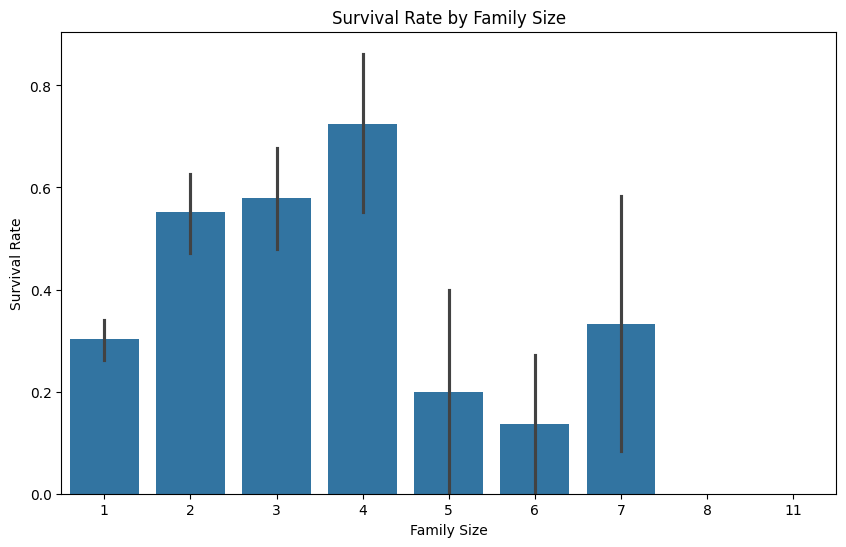

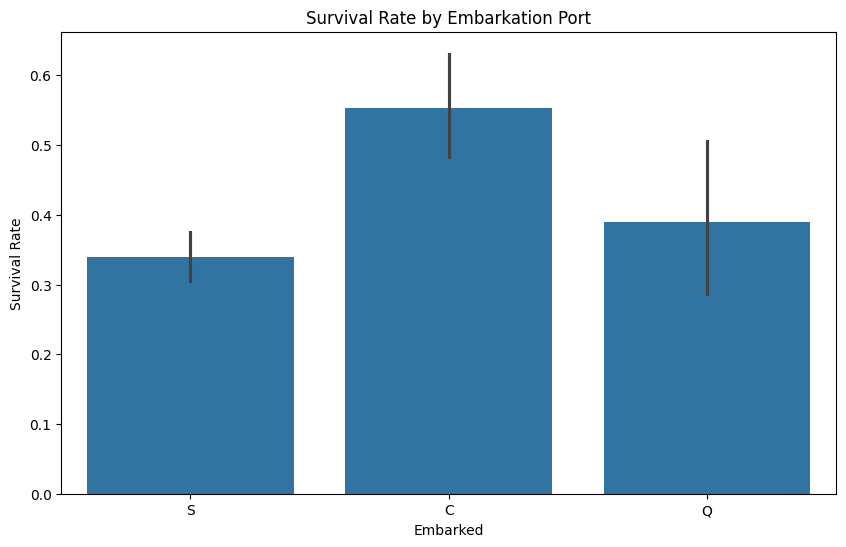

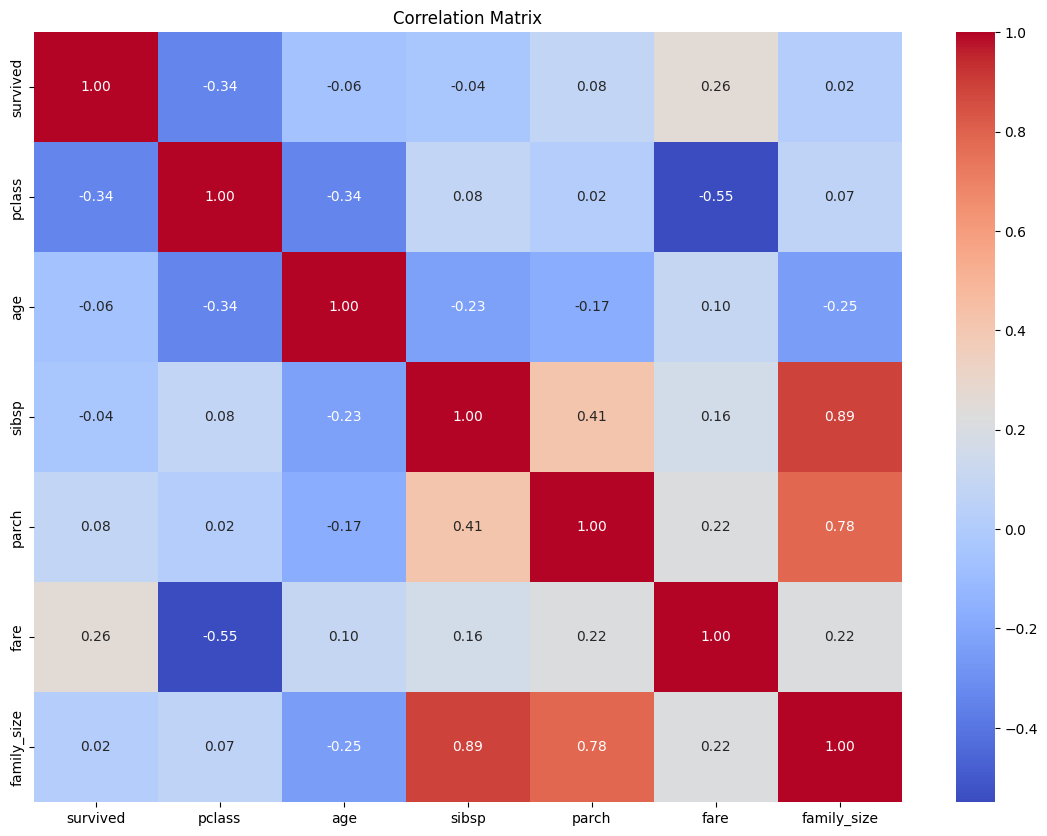

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seaborn에서 Titanic 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 데이터 확인
print("Initial Data:\n", titanic.head())
print("\nData Information:\n")
titanic.info()
print("\nMissing Values:\n", titanic.isnull().sum())

# 1. 결측치 처리
# 'age' 컬럼의 결측치를 중간값으로 대체
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# 'embarked' 컬럼의 결측치를 최빈값으로 대체
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# 'deck' 컬럼의 결측치는 너무 많아서 해당 컬럼 제거
if 'deck' in titanic.columns:
    titanic.drop(columns=['deck'], inplace=True)

# 'embark_town' 컬럼의 결측치는 'embarked' 컬럼으로 대체 가능
if 'embark_town' in titanic.columns:
    titanic.drop(columns=['embark_town'], inplace=True)

# 'alive' 컬럼은 'survived' 컬럼과 중복 정보이므로 제거
if 'alive' in titanic.columns:
    titanic.drop(columns=['alive'], inplace=True)

# 'who' 컬럼은 'sex'와 유사한 정보 제공, 'adult_male'은 나이 정보로 유추 가능하므로 제거
if 'who' in titanic.columns:
    titanic.drop(columns=['who'], inplace=True)
if 'adult_male' in titanic.columns:
    titanic.drop(columns=['adult_male'], inplace=True)

# 'alone' 컬럼은 'sibsp'와 'parch'를 통해 유추 가능하므로 제거
if 'alone' in titanic.columns:
    titanic.drop(columns=['alone'], inplace=True)

# 4. 데이터 시각화 및 탐색적 데이터 분석 (EDA)

# 생존자와 사망자 분포
sns.countplot(data=titanic, x='survived')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 성별에 따른 생존율
sns.barplot(data=titanic, x='sex', y='survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()
# -> 여성 생존 비율이 더 높음

# 나이에 따른 생존율
sns.histplot(data=titanic, x='age', bins=30, kde=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()
# -> 2-30대의 생존 비율이 제일 높으며 나이가 많아질수록 생존율 감소 + 영유아 생존 비율 꽤 높음

# 좌석 등급에 따른 생존율
sns.barplot(data=titanic, x='pclass', y='survived')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()
# -> 등급에 따라 생존율 비례

# 요금(fare) 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 가족 크기(family_size) 분포 및 생존율
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='family_size', bins=8, kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()
# -> 가족 단위 구성은 수가 적을수록 많음

sns.barplot(data=titanic, x='family_size', y='survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()
# -> 4명 단위일 때가 생존율이 가장 높으며, 단위수가 적을수록 생존율 높음

# 승선 장소에 따른 생존율
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='embarked', y='survived')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

# 상관 행렬 히트맵 (숫자형 컬럼만 사용)
plt.figure(figsize=(14, 10))
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_titanic.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# -> 생존과는 요금, 등급과는 탑승객과 동반한 형제자매와 배우자의 수,  탑승객과 동반한 부모(parent)와 자녀의 수와는 가족 구성원 수가 가장 큰 상관관계를 나타낸다.
# 결론 -> 생존율은 좌석 요금에 비례함
